### **1. Import Libraries, Load and Inspect Datasets**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('survey/dataset_psycology_survey.csv')
df_pred_ = pd.read_csv('survey/submission_psycology_survey.csv')
print('Pandas done reading.')

Pandas done reading.


In [2]:
print('Training dataset has {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))
print('\n' + '* ' * 40)
print(df_train.head())

Training dataset has 970 rows and 150 columns

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   

In [3]:
print('Prediction dataset has {} rows and {} columns'.format(df_pred_.shape[0], df_pred_.shape[1]))
print('\n' + '* ' * 40)
df_pred_.head()

Prediction dataset has 40 rows and 150 columns

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


,Unnamed: 0,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,0,5.0,5.0,4.0,3.0,2.0,4.0,4.0,3.0,5.0,...,28.0,180.0,70.0,1.0,female,right handed,masters degree,no,city,block of flats
1,1,5.0,2.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0,...,20.0,155.0,44.0,0.0,female,right handed,secondary school,yes,village,house/bungalow
2,2,5.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,5.0,...,21.0,169.0,61.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
3,3,5.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,...,19.0,185.0,70.0,1.0,male,right handed,secondary school,yes,city,house/bungalow
4,4,5.0,4.0,4.0,2.0,1.0,4.0,4.0,3.0,2.0,...,23.0,179.0,77.0,1.0,male,right handed,secondary school,yes,village,house


### **Find Mismatched Columns Between Datasets**

In [4]:
train_pred = [x for x in df_train.columns if x not in df_pred_.columns]
pred_train = [x for x in df_pred_.columns if x not in df_train.columns]
print(train_pred)
print(pred_train)

['Spending on healthy eating']
['Unnamed: 0']


### **2. Perform EDA for Datasets**
> #### **2.1. Select Features and Change Columns Names**



In [5]:
new_names = {'Healthy eating':    'Lifestyle',
             'Spending on looks': 'Look',
             'Eating to survive': 'Taste'}

df_train.rename(columns={'Spending on healthy eating': 'Spend'}, inplace=True)
df_train.rename(columns=new_names, inplace=True)
df_pred_.rename(columns=new_names, inplace=True)

main_idx = [75, 93, 101, 137, 141, 142, 95, 140, 144, 146]
features = [df_train.columns.tolist()[k] for k in main_idx]
# Slice the prediction datamframe be selected features
df_pred_= df_pred_[features]

# Add target in features to slice the training dataframe
features.append('Spend')
df_train = df_train[features]

print(df_train.sample(10))
print('\n' + '* ' * 30)
print(df_pred_.sample(10))

     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
167        3.0           1.0     3.0   2.0   187.0    75.0      2  21.0   
424        3.0           3.0     4.0   4.0   164.0    58.0      2  19.0   
129        3.0           3.0     3.0   5.0   170.0    59.0      5  16.0   
929        1.0           4.0     3.0   1.0   180.0    70.0      1  19.0   
758        2.0           3.0     4.0   2.0   185.0   120.0      4  24.0   
39         3.0           5.0     3.0   3.0   155.0    46.0      1  21.0   
884        4.0           2.0     4.0   4.0   185.0    84.0      3  17.0   
796        2.0           5.0     3.0   5.0   165.0    57.0      1  20.0   
921        4.0           1.0     2.0   2.0     NaN     NaN      2   NaN   
235        3.0           1.0     3.0   4.0   175.0    63.0      1  21.0   

     Gender                Education  Spend  
167    male        secondary schools    4.0  
424  female         secondary school    4.0  
129  female         secondary school

> #### **2.2. Find Duplicate Rows in Datasets**

In [6]:
features.remove('Spend')
dups = df_train[df_train.duplicated(subset=features, keep=False)]
print(dups)

     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
352        4.0           4.0     4.0   1.0   167.0    50.0      4  19.0   
353        4.0           4.0     4.0   1.0   167.0    50.0      4  19.0   
838        1.0           1.0     2.0   4.0   162.0    54.0      2  18.0   
844        1.0           1.0     2.0   4.0   162.0    54.0      2  18.0   
847        2.0           1.0     2.0   2.0   168.0    57.0      2  19.0   
941        2.0           1.0     2.0   2.0   168.0    57.0      2  19.0   

     Gender                Education  Spend  
352  female  college/bachelor degree    4.0  
353  female  college/bachelor degree    4.0  
838  female         secondary school    2.0  
844  female         secondary school    3.0  
847  female         secondary school    2.0  
941  female         secondary school    4.0  


In [7]:
removed_idx = [353, 844, 941]
print(removed_idx)

[353, 844, 941]


> #### **2.3. Find Outliners in Datasets**

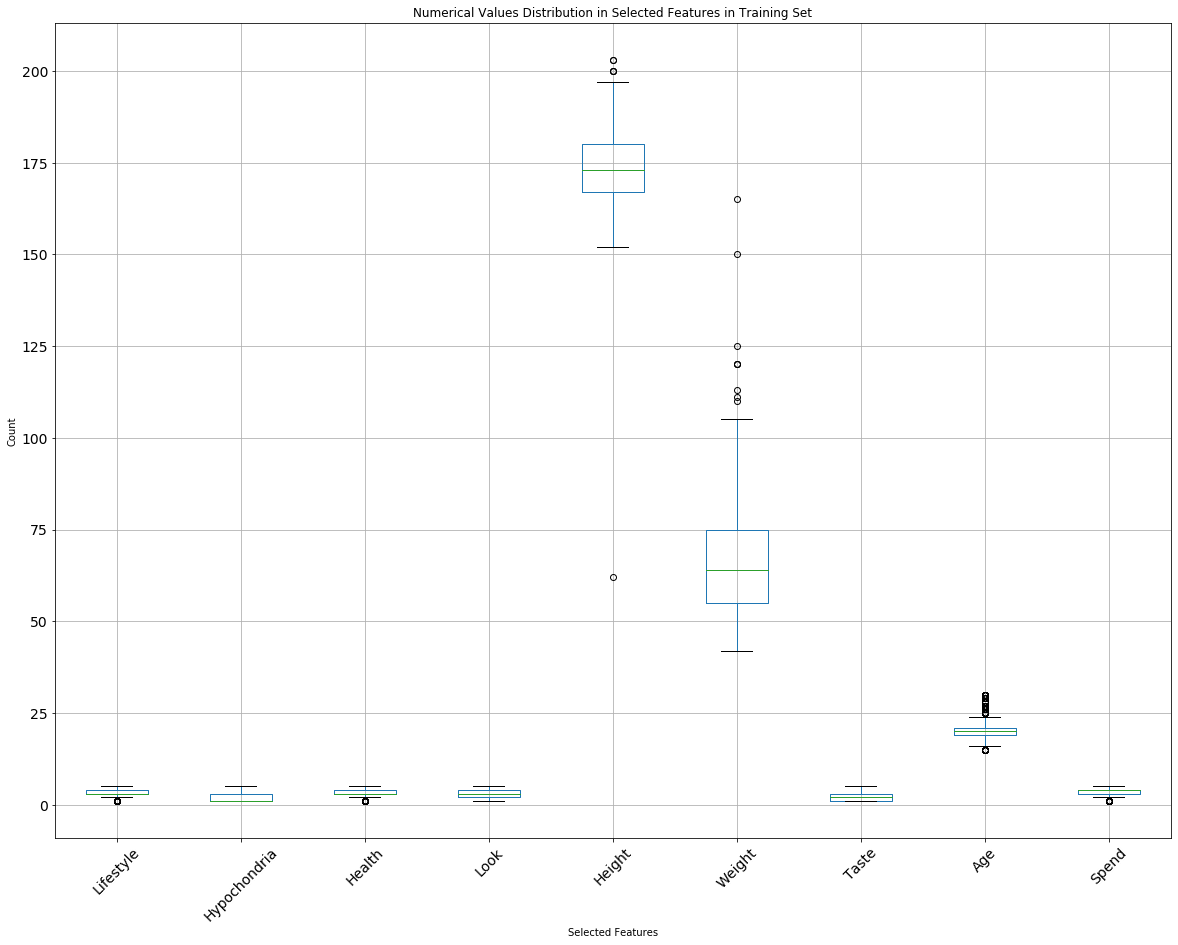

In [8]:
df_train.boxplot(figsize=(20,15), rot=45)
plt.tick_params(labelsize=14)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Numerical Values Distribution in Selected Features in Training Set')
plt.show()

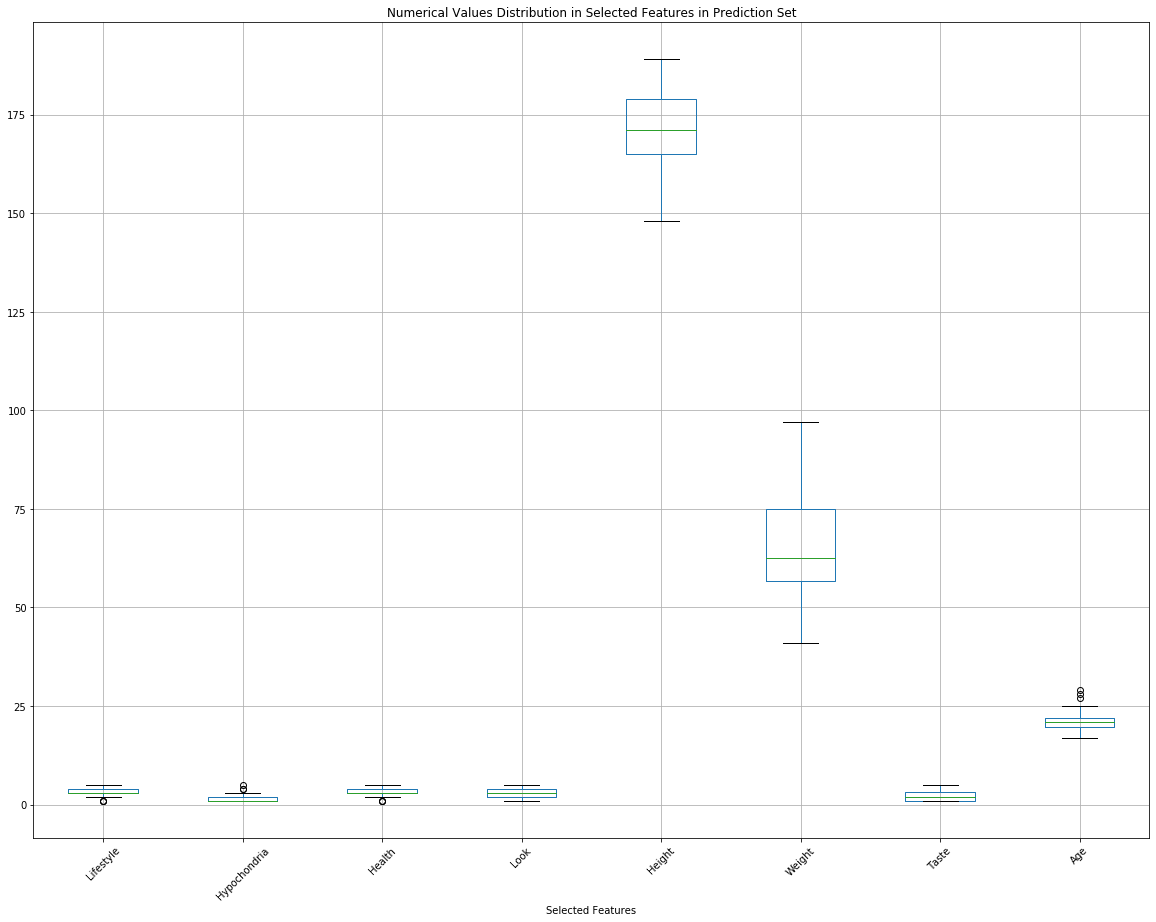

In [9]:
df_pred_.boxplot(figsize=(20,15), rot=45)
plt.xlabel('Selected Features')
plt.title('Numerical Values Distribution in Selected Features in Prediction Set')
plt.show()

In [10]:
# over_height defined by Height of anyone > 200cm
over_height = df_train[df_train.Height > 200]
removed_idx.extend(over_height.index.to_list())
print(over_height)

# under_height defined by Height of anyone < 125cm
under_height = df_train[df_train.Height < 125]
removed_idx.extend(under_height.index.to_list())
print(under_height)

# over_weight defined by Weight of anyone > 110kg
over_weight = df_train[df_train.Weight > 110]
removed_idx.extend(over_weight.index.to_list())
print(over_weight)

print('Rows with following indices needs to be removed:')
print(removed_idx)

     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
523        2.0           1.0     2.0   1.0   203.0    80.0      1  21.0   
764        3.0           2.0     3.0   3.0   203.0    89.0      2  18.0   

    Gender         Education  Spend  
523   male  secondary school    4.0  
764   male  secondary school    4.0  
     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
646        4.0           2.0     3.0   4.0    62.0    55.0      1  20.0   

     Gender                Education  Spend  
646  female  college/bachelor degree    4.0  
     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
283        3.0           1.0     3.0   5.0   184.0   120.0      1  21.0   
683        2.0           1.0     3.0   1.0   183.0   111.0      1  29.0   
758        2.0           3.0     4.0   2.0   185.0   120.0      4  24.0   
761        3.0           1.0     4.0   5.0   189.0   113.0      4  27.0   
823        3.0           1.0     1.0   5.0

> #### **2.4. Remove Duplicated and Unecessary Outliners in Training Dataset**

In [11]:
df_train.drop(index=removed_idx, inplace=True)
df_train.reset_index(drop=True, inplace=True)

> #### **2.5. Find and Fill Missing Values in Datasets**

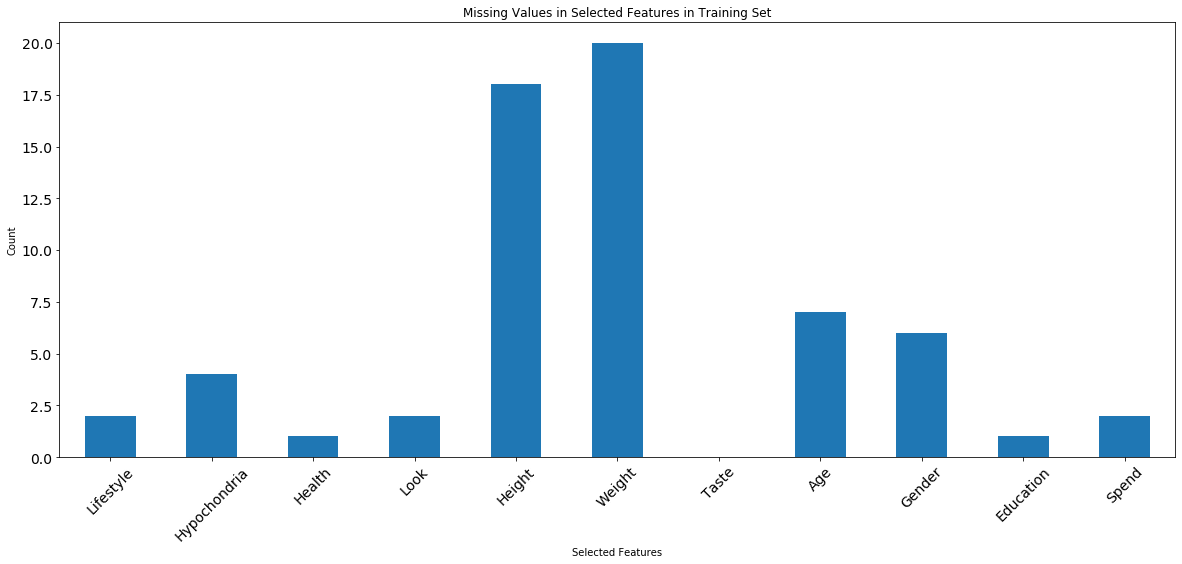

In [12]:
df_train.isnull().sum().plot(kind='bar', figsize=(20,8), rot=45)
plt.tick_params(labelsize=14)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Missing Values in Selected Features in Training Set')
plt.show()

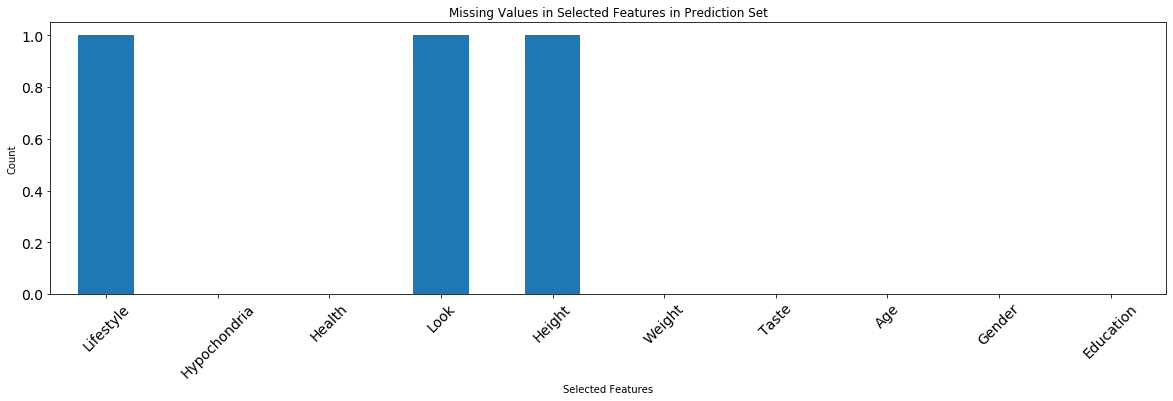

In [13]:
df_pred_.isnull().sum().plot(kind='bar', figsize=(20,5), rot=45)
plt.tick_params(labelsize=14)
plt.ylabel('Count')
plt.xlabel('Selected Features')
plt.title('Missing Values in Selected Features in Prediction Set')
plt.show()

> #### **Fill Each Missing Value with Column Median**

In [14]:
df_train = df_train.fillna(df_train.median())
df_pred_ = df_pred_.fillna(df_pred_.median())

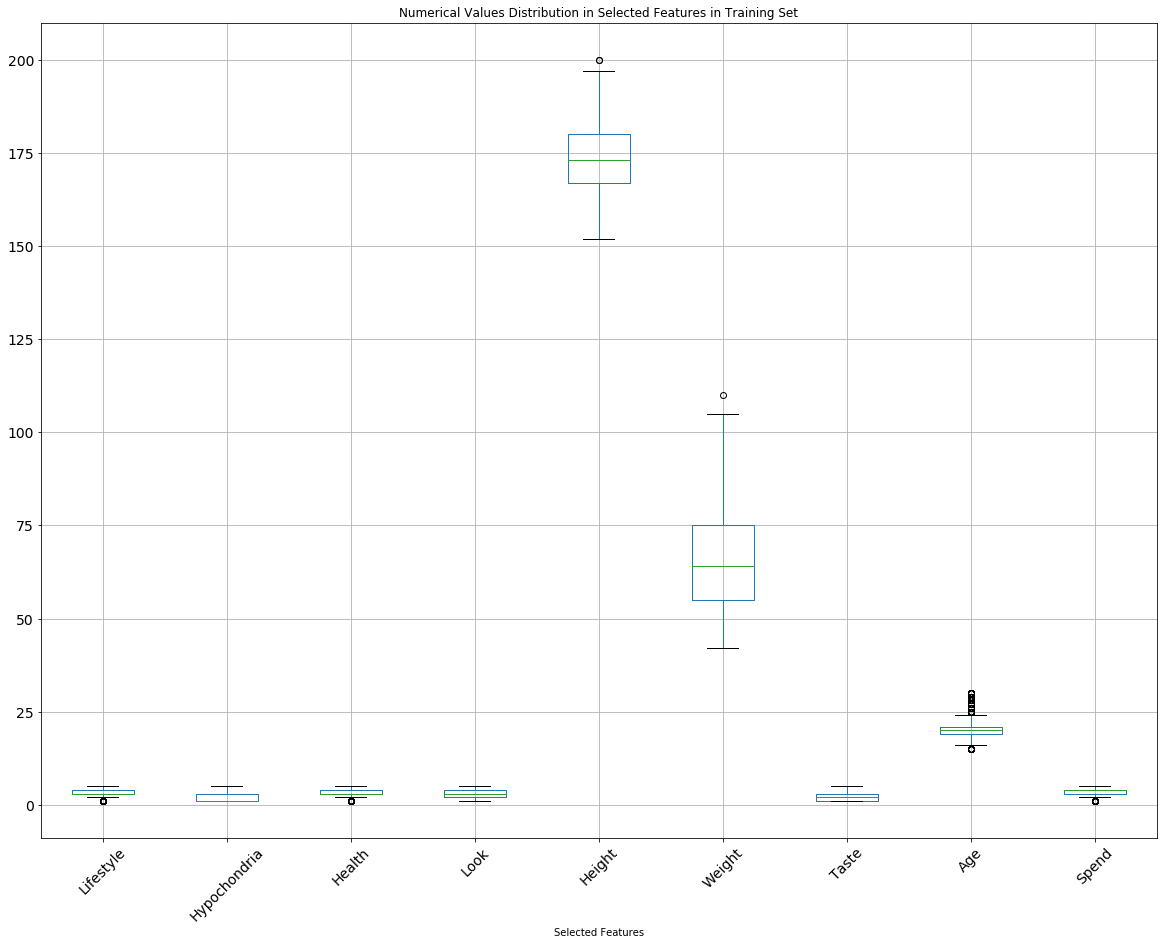

In [15]:
df_train.boxplot(figsize=(20,15), rot=45)
plt.tick_params(labelsize=14)
plt.xlabel('Selected Features')
plt.title('Numerical Values Distribution in Selected Features in Training Set')
plt.show()

> #### **2.6. Feature Selection and Engineering**

In [16]:
print(df_train.sample(10))
print('\n' + '* ' * 30)
print(df_pred_.sample(10))
print('\n' + '* ' * 30)
print('Datasets selected deatures:', features)

     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
676        4.0           1.0     1.0   4.0   173.0    64.0      2  20.0   
599        3.0           1.0     5.0   1.0   170.0    60.0      1  20.0   
891        1.0           2.0     4.0   4.0   172.0    59.0      2  16.0   
854        3.0           2.0     2.0   3.0   173.0    64.0      1  20.0   
434        5.0           4.0     5.0   5.0   180.0    63.0      1  28.0   
689        1.0           1.0     3.0   5.0   175.0    80.0      1  19.0   
827        2.0           1.0     2.0   3.0   182.0    73.0      2  20.0   
212        1.0           1.0     3.0   5.0   192.0    90.0      3  26.0   
596        4.0           5.0     3.0   5.0   173.0    62.0      1  21.0   
949        3.0           2.0     3.0   3.0   172.0    63.0      3  20.0   

     Gender                Education  Spend  
676  female         secondary school    5.0  
599  female  college/bachelor degree    1.0  
891    male           primary school

In [17]:
f_gender = lambda g: 'Male' if g == 'male' else 'Female'
df_train['Gender'] = df_train['Gender'].apply(f_gender)
df_pred_['Gender'] = df_pred_['Gender'].apply(f_gender)

degrees = ['college/bachelor degree', 'masters degree', 'MS', 'doctorate degree']
f_education = lambda e: 'Degree' if e in degrees else 'Non_Degree'
df_train['Education'] = df_train['Education'].apply(f_education)
df_pred_['Education'] = df_pred_['Education'].apply(f_education)

df_train = pd.get_dummies(df_train, drop_first=True, prefix='', prefix_sep='')
df_pred_ = pd.get_dummies(df_pred_, drop_first=True, prefix='', prefix_sep='')

df_train['Taste'] = df_train['Taste'].astype(float)
df_pred_['Taste'] = df_pred_['Taste'].astype(float)

df_train['BMI'] = df_train.Weight / (df_train.Height**2)
df_pred_['BMI'] = df_pred_.Weight / (df_pred_.Height**2)

print(df_train.sample(10))
print('\n' + '* ' * 45)
print(df_train.info())
print('\n' + '* ' * 45)
print(df_pred_.sample(10))
print('\n' + '* ' * 45)
print(df_pred_.info())

     Lifestyle  Hypochondria  Health  Look  Height  Weight  Taste   Age  \
237        3.0           1.0     3.0   4.0   160.0    46.0    3.0  20.0   
119        3.0           2.0     3.0   2.0   172.0    80.0    2.0  20.0   
166        4.0           1.0     5.0   1.0   191.0    85.0    2.0  22.0   
872        2.0           1.0     2.0   3.0   165.0    54.0    1.0  20.0   
55         3.0           3.0     4.0   5.0   170.0    64.0    3.0  20.0   
330        1.0           3.0     3.0   5.0   158.0    53.0    1.0  18.0   
142        3.0           2.0     4.0   1.0   185.0    83.0    3.0  18.0   
693        2.0           1.0     3.0   4.0   163.0    57.0    2.0  18.0   
819        3.0           1.0     2.0   2.0   185.0    85.0    2.0  20.0   
944        3.0           2.0     2.0   3.0   192.0   105.0    1.0  28.0   

     Spend  Male  Non_Degree       BMI  
237    3.0     0           1  0.001797  
119    4.0     0           1  0.002704  
166    5.0     1           1  0.002330  
872    3.0

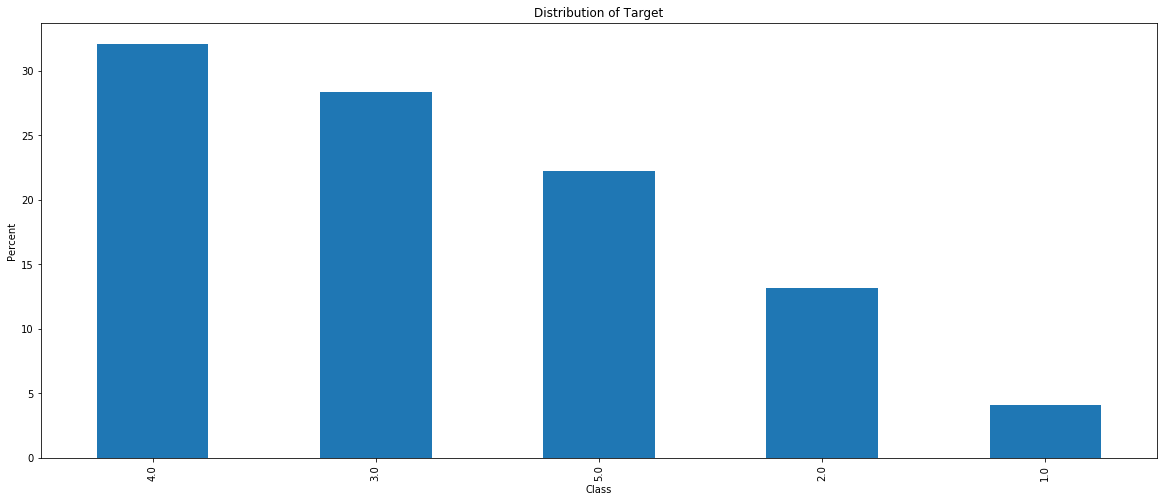

(956,)


In [18]:
(100 * df_train['Spend'].value_counts(dropna=True) / len(df_train['Spend'])).plot(kind='bar', figsize=(20,8))
plt.ylabel('Percent')
plt.xlabel('Class')
plt.title('Distribution of Target')
plt.show()
print(df_train['Spend'].shape)

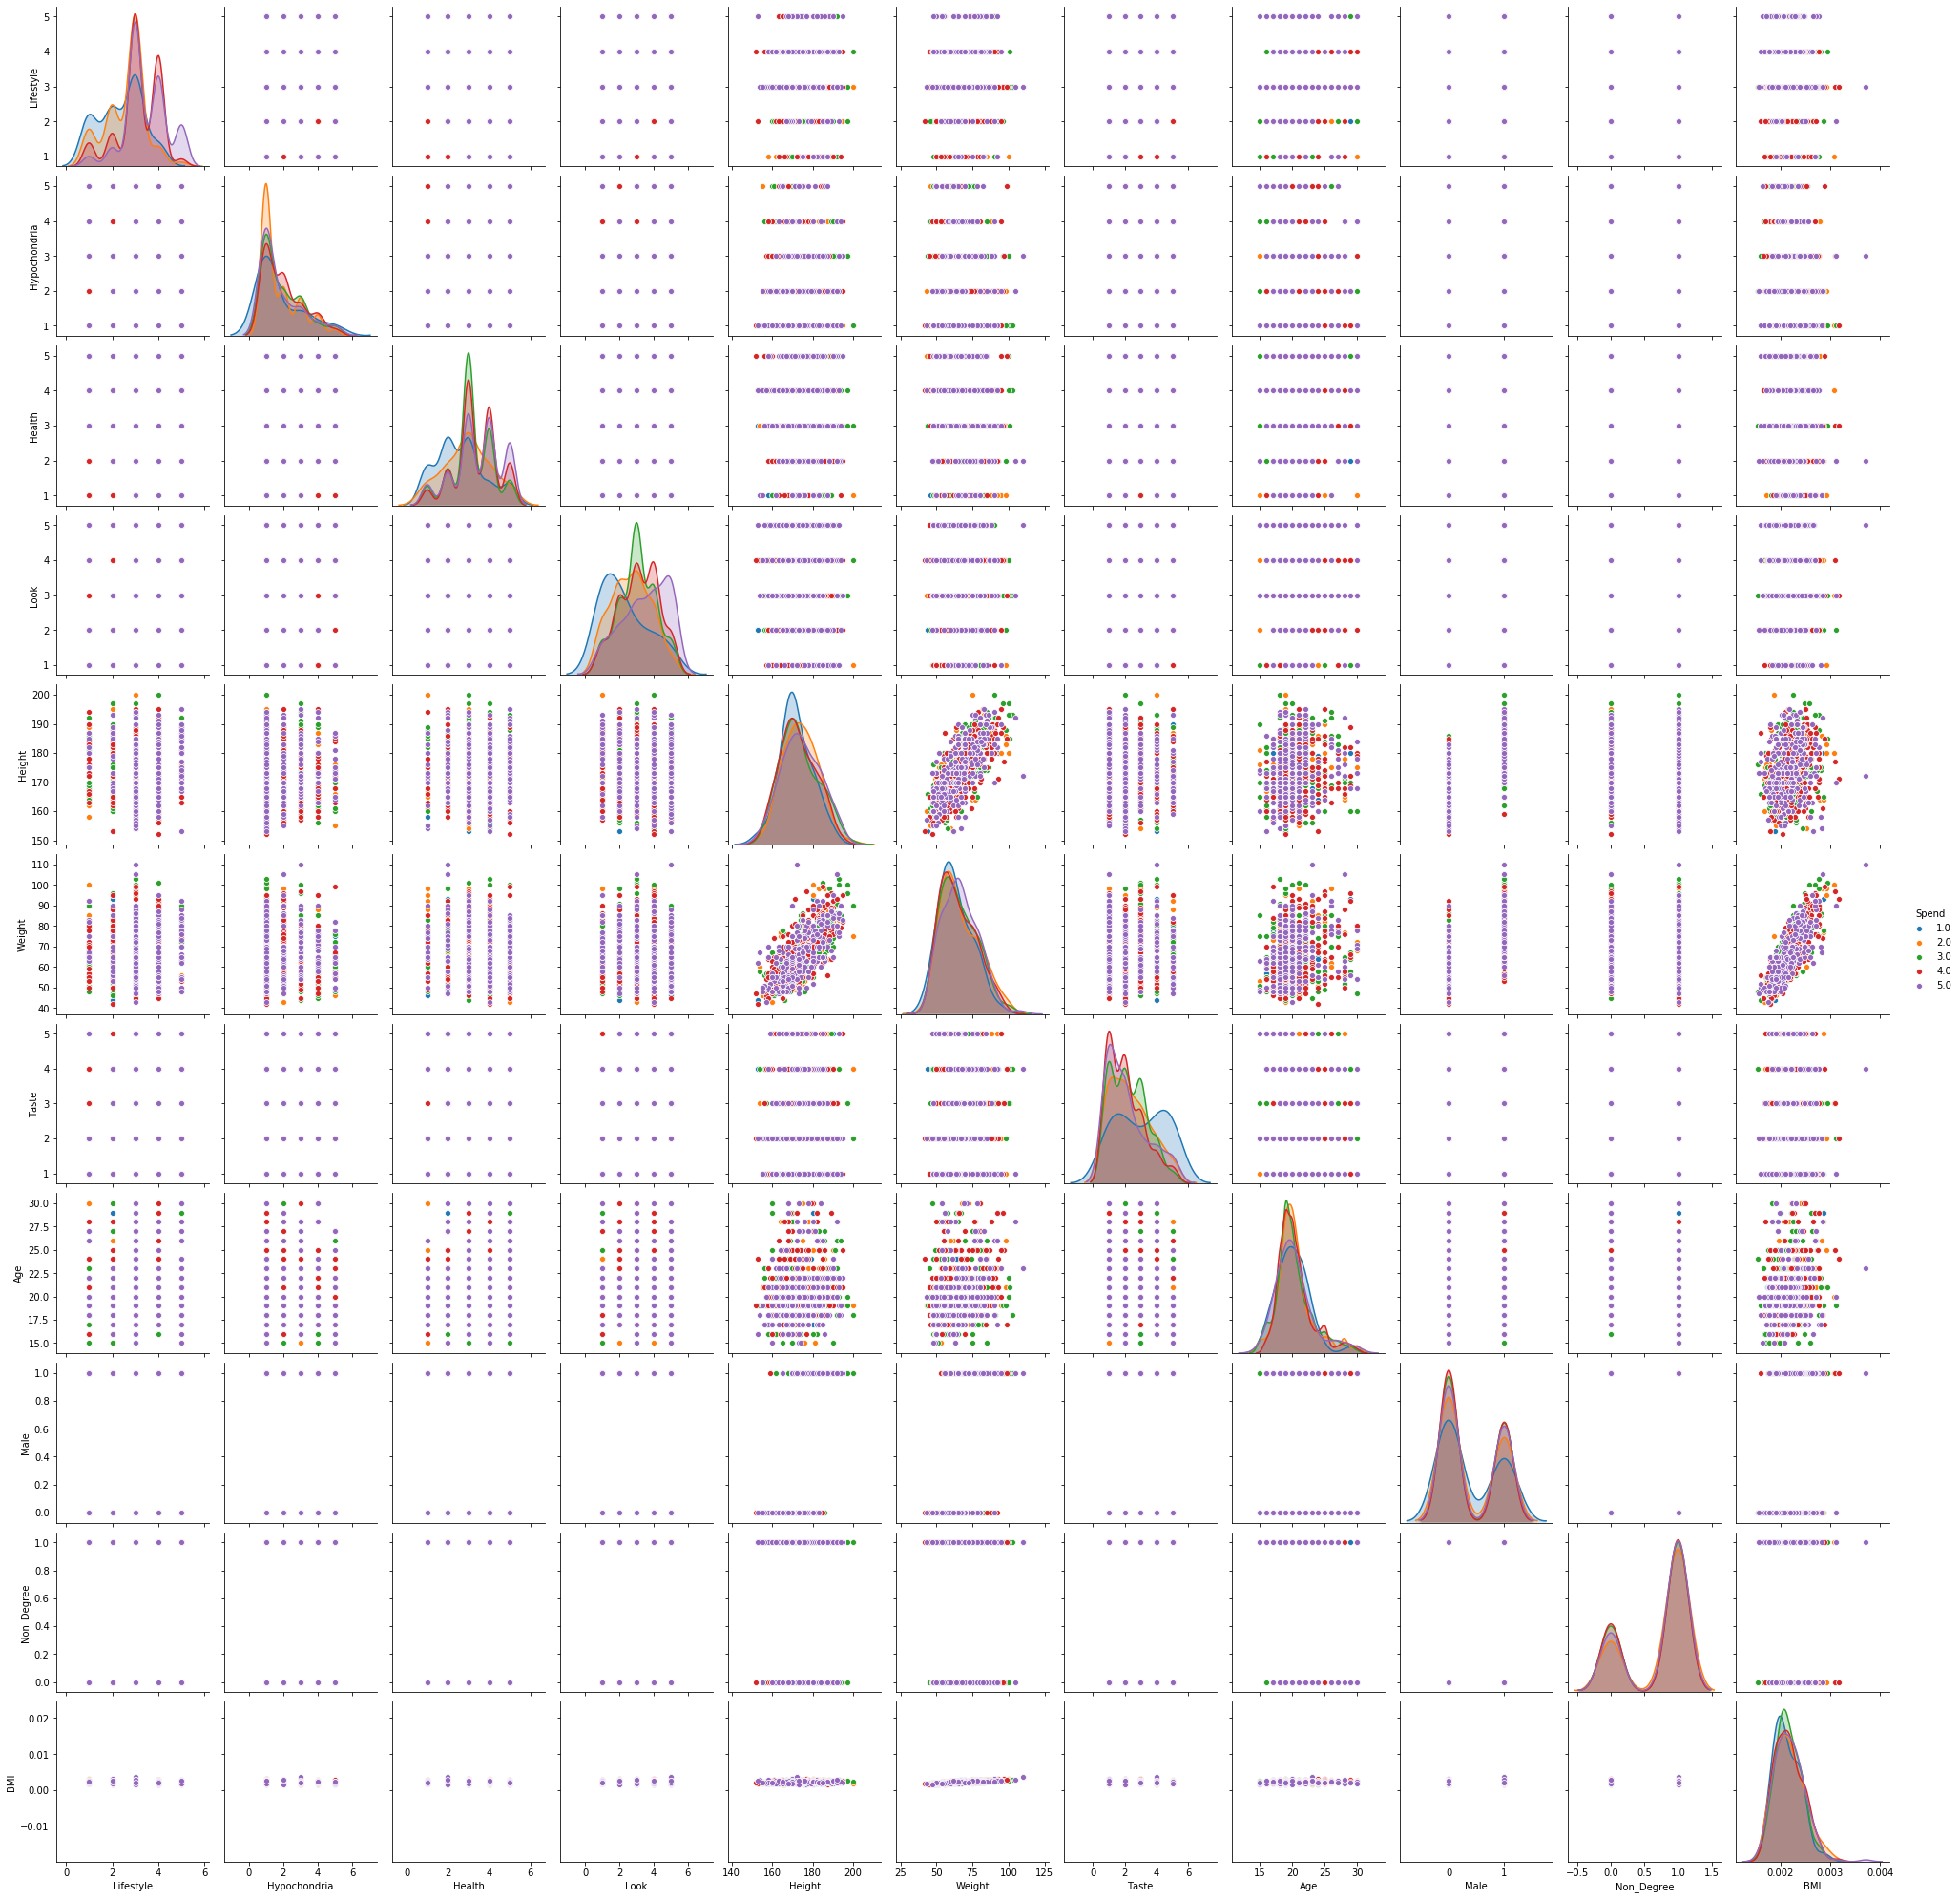

In [19]:
features = df_pred_.columns.to_list()
sns.pairplot(pd.concat([df_train[features], df_train['Spend']], axis=1), hue='Spend')
plt.show()

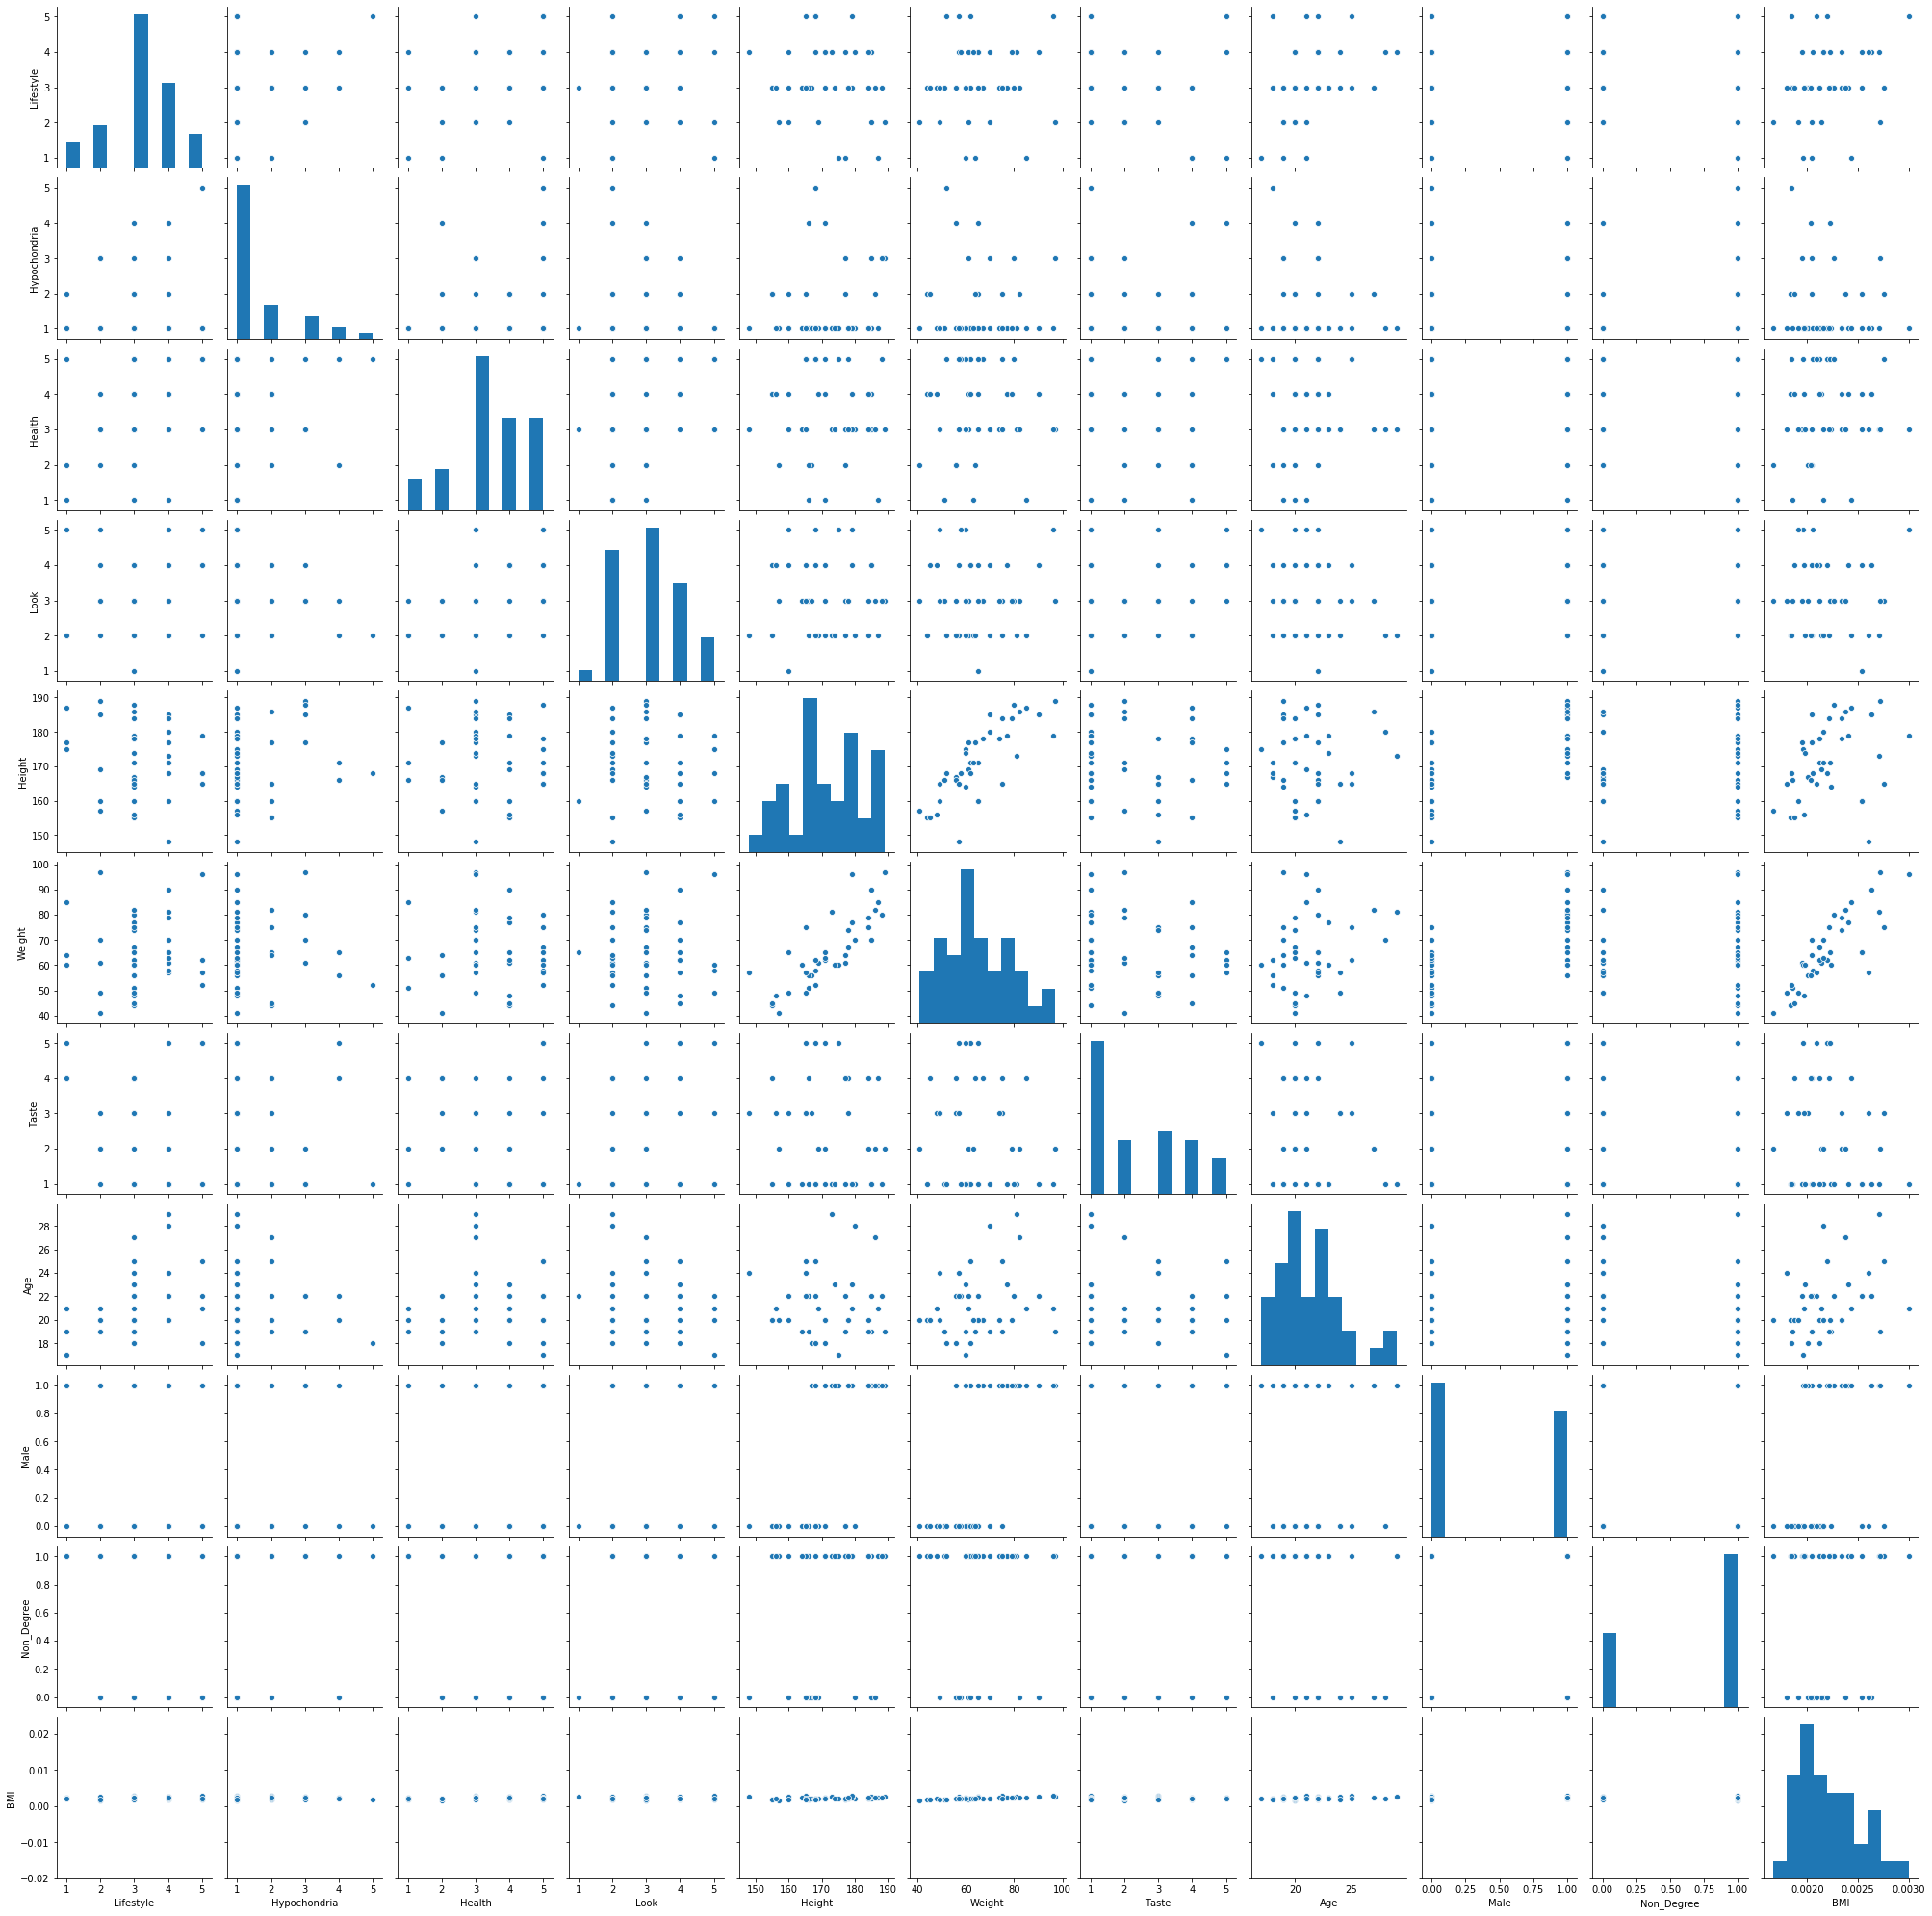

In [20]:
sns.pairplot(df_pred_)
plt.show()

> #### **2.7. Verify Engineered Features**

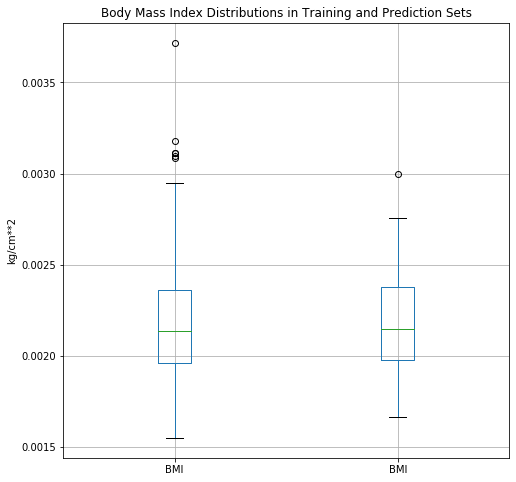

In [21]:
pd.concat([df_train.BMI, df_pred_.BMI], axis=1).boxplot(figsize=(8,8))
plt.ylabel('kg/cm**2')
plt.title('Body Mass Index Distributions in Training and Prediction Sets')
plt.show()

> #### **2.8. Verify Training, Prediction Dataset and All Features**

In [22]:
print('Sizes of training and prediction datasets:')
print(df_train.shape, df_pred_.shape)
print('\n' + '* ' * 45)
print('Features of training dataset:')
print(df_train.columns.to_list())
print('\n' + '* ' * 45)
print('Features of prediction dataset:')
print(df_pred_.columns.to_list())

Sizes of training and prediction datasets:
(956, 12) (40, 11)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Features of training dataset:
['Lifestyle', 'Hypochondria', 'Health', 'Look', 'Height', 'Weight', 'Taste', 'Age', 'Spend', 'Male', 'Non_Degree', 'BMI']

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Features of prediction dataset:
['Lifestyle', 'Hypochondria', 'Health', 'Look', 'Height', 'Weight', 'Taste', 'Age', 'Male', 'Non_Degree', 'BMI']


> #### **2.9. Apply PCA on Datasets**

In [23]:
from sklearn.decomposition import PCA
n_comps = 4
pca_train = PCA(n_components=n_comps)
pca_train.fit(df_train[features])
print(np.round(pca_train.explained_variance_ratio_ * 100, 0))
df_train_pca = pca_train.transform(df_train[features]) 
print('\n' + '* ' * 20)
pca_pred_ = PCA(n_components=n_comps)
pca_pred_.fit(df_pred_)
print(np.round(pca_pred_.explained_variance_ratio_ * 100, 0))
df_pred__pca = pca_pred_.transform(df_pred_) 

[83. 11.  3.  1.]

* * * * * * * * * * * * * * * * * * * * 
[87.  9.  2.  1.]


### **3. Train and Validate Baseline Models**
> #### **3.1. Set up Librabries and Helper Functions**

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def get_models(seed=111, n_trees=100):
    models = {}
    # Logistic Regression
    models['LGR'] = LogisticRegression()
    # Support Vector Classifier
    models['SVC'] = SVC(gamma='auto')
    # KNearest Neighbors Classifier
    models['KNN'] = KNeighborsClassifier(n_neighbors=3)
    # Bagging Classifier
    models['BAG'] = BaggingClassifier(n_estimators=n_trees, random_state=seed)
    # Random Forest Classifier
    models['RFR'] = RandomForestClassifier(n_estimators=n_trees, random_state=seed)
    # Extra Trees Classifier
    models['ETC'] = ExtraTreesClassifier(n_estimators=n_trees, random_state=seed)
    # Quadratic Discriminant Analysis
    models['QDA'] = QuadraticDiscriminantAnalysis()
    # Neural Network
    models['ANN'] = MLPClassifier()
    return models

> #### **3.2. Train and Validate Models**

In [25]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import cross_val_predict as CVP

f = ['Lifestyle', 'Hypochondria', 'Look'] 
y = df_train['Spend'].apply(lambda x: x if x > 2 else 2)
X, y = np.array(df_train[f]), np.array(y)

model_accuracy, seed, n_trees = {}, 111, 100
models, m = get_models(seed, n_trees), len(np.unique(y))

for name, model in models.items():
  acc, cfm = [], np.zeros((m,m))
  kf = KFold(n_splits=5, shuffle=True, random_state=seed)
  acc = CVS(model, X, y, cv=kf, scoring='accuracy')
  y_pred = CVP(model, X, y, cv=kf)
  cfm = confusion_matrix(y, y_pred)
  model_accuracy[name] = acc
  print('Model\tAccuracy (Mean)\tAccuracy (STD)')
  print('{}\t{:.3f}\t\t{:.3f}'.format(name, np.mean(acc), np.std(acc)))
  print('\tConfusion Matrix:')
  print(cfm)
  print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
LGR	0.364		0.034
	Confusion Matrix:
[[ 31  50  75   9]
 [ 25  49 170  27]
 [ 21  39 196  51]
 [  7  16 118  72]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
SVC	0.413		0.022
	Confusion Matrix:
[[ 43  80  37   5]
 [ 24 154  83  10]
 [ 25 118 141  23]
 [ 10  67  79  57]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
KNN	0.311		0.034
	Confusion Matrix:
[[ 58  60  36  11]
 [ 76 107  62  26]
 [ 79 106  80  42]
 [ 31  64  66  52]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
BAG	0.383		0.020
	Confusion Matrix:
[[ 44  65  46  10]
 [ 38 119  89  25]
 [ 34  90 143  40]
 [ 18  53  82  60]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
RFR	0.386		0.018
	Confusion Matrix:
[[ 44  67  45   9]
 [ 38 117  91  25]
 [ 32  92 146  37]
 [ 16  54  81  62]]

* * * * * * * * * * * * * * * 
Model	Accuracy (Mean)	Accuracy (STD)
ETC	0.384		0.018
	Confusion Matrix:
[[ 45  73  41   6

> #### **3.3. Visualize Accuracy Scores**

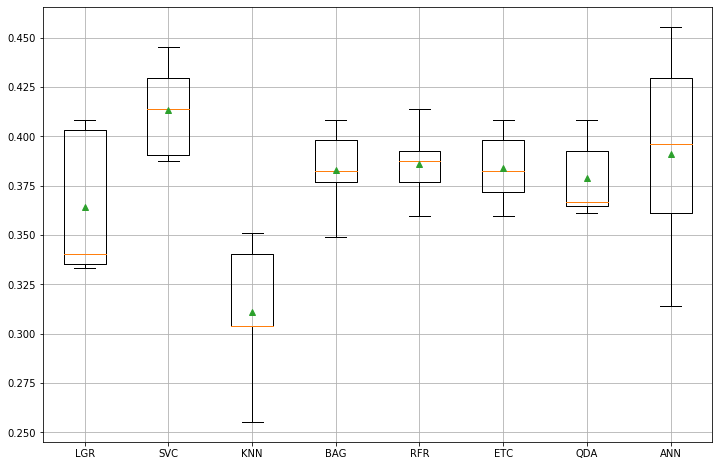

In [26]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()

### **4. Improve Model Performances by Stacking the Best Models**

In [28]:
from sklearn.ensemble import StackingClassifier

seed, n_trees = 111, 100
models = get_models(seed, n_trees)

hidden_layers = [('SVC', models['SVC']), ('RFR', models['RFR'])]
last_layer = models['ANN'] 
model = StackingClassifier(estimators=hidden_layers, final_estimator=last_layer)

f = ['Lifestyle', 'Hypochondria', 'Look'] 
y = df_train['Spend'].apply(lambda x: x if x > 2 else 2)
X, y = np.array(df_train[f]), np.array(y)

m = len(np.unique(y))
acc, cfm = [], np.zeros((m,m))

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
acc = CVS(model, X, y, cv=kf, scoring='accuracy')
y_pred = CVP(model, X, y, cv=kf)
cfm = confusion_matrix(y, y_pred)
model_accuracy['STACK'] = acc
print('Model\tAccuracy (Mean)\tAccuracy (STD)')
print('STACK\t{:.3f}\t\t{:.3f}'.format(np.mean(acc), np.std(acc)))
print('\tConfusion Matrix:')
print(cfm)
print('\n' + '* ' * 15)

Model	Accuracy (Mean)	Accuracy (STD)
STACK	0.399		0.021
	Confusion Matrix:
[[ 39  77  43   6]
 [ 27 144  85  15]
 [ 18 106 149  34]
 [ 11  57  84  61]]

* * * * * * * * * * * * * * * 


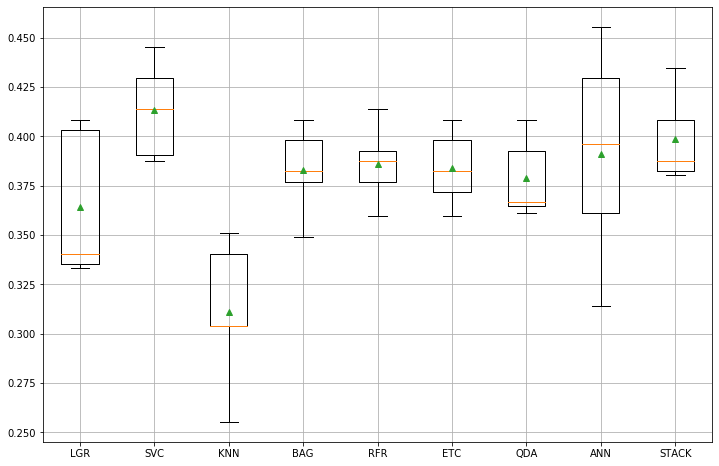

In [29]:
# Plot the accuracy scores
plt.boxplot(list(model_accuracy.values()), 
            labels=list(model_accuracy.keys()), showmeans=True)
plt.grid()
plt.gcf().set_size_inches(12,8)
plt.show()